# Kong figure 5; Key figures 4 and 5

 1. Sea-subsurface => two halfspaces; Kong (2007) Figure 5  
    Rec on interface, src 50 m above
 2. Canonical model; Key (2012) Figure 5  
    1000 m water layer, rec on interface, src 10 m above
 3. Land case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import empymod as epm

### Plot settings and functions

In [2]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 8

# Line styles
ls = {'Kong241': (0, (4, 1, 1, 1, 1, 1)),
      'Key201': (0, (4, 1, 1, 1)),
      'And801': (0, (1, 1)),
      'Wer201': (0, (5, 1))}

save = False

def abs10(x):
    """Return log10(abs(x))."""
    return np.log10(np.abs(x))


def error(x, y):
    """Return relative error abs10((x-y)/y)."""
    return abs10((x-y)/y)


def create_axis(nr, title):
    """Create subplot; do some adjustments."""
    # Create subplot and add title
    ax = plt.subplot(nr)
    ax.set_title(title)
    
    # Show horizontal gridlines, switch off frame
    ax.grid(axis='y', color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    # Limits and ticks
    ax.set_xticks([0, 5, 10, 15, 20])
    ax.set_xlim([0, 20])
    
    # If second subplot move y-axis to the right
    if nr > 121:
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")

    # Labels
    ax.set_xlabel('Offset (km)')

    return ax

### General model parameters

In [3]:
x = np.arange(1, 101)*200
inp = {
    'src': [0, 0, 0],    # Source
    'rec': [x, x*0, 0],  # Receivers
    'ab': 11,            # x-directed source and receiver
    'freqtime': 1,       # Frequency
    'xdirect': True,
    'verb': 1
}    

## Kong Figure 5

In [4]:
# Model for Kong-figure
inp1 = inp.copy()
inp1['src'][2] = -50
inp1['rec'][2] = 0 
inp1['depth'] = 0
inp1['res'] = [1/3.2, 1]

# Calculate responses
kong = {}
kong['Kong241'] = epm.dipole(htarg='kong_241_2007', **inp1)
kong['Key201'] = epm.dipole(htarg='key_201_2012', **inp1)
kong['And801'] = epm.dipole(htarg='anderson_801_1982', **inp1)
kong['Wer201'] = epm.dipole(htarg='wer_201_2018', **inp1)
kqwe = epm.dipole(ht='qwe', **inp1)

* WARNING :: Hankel-quadrature did not converge at least once;
             => desired `atol` and `rtol` might not be achieved.


### Figure

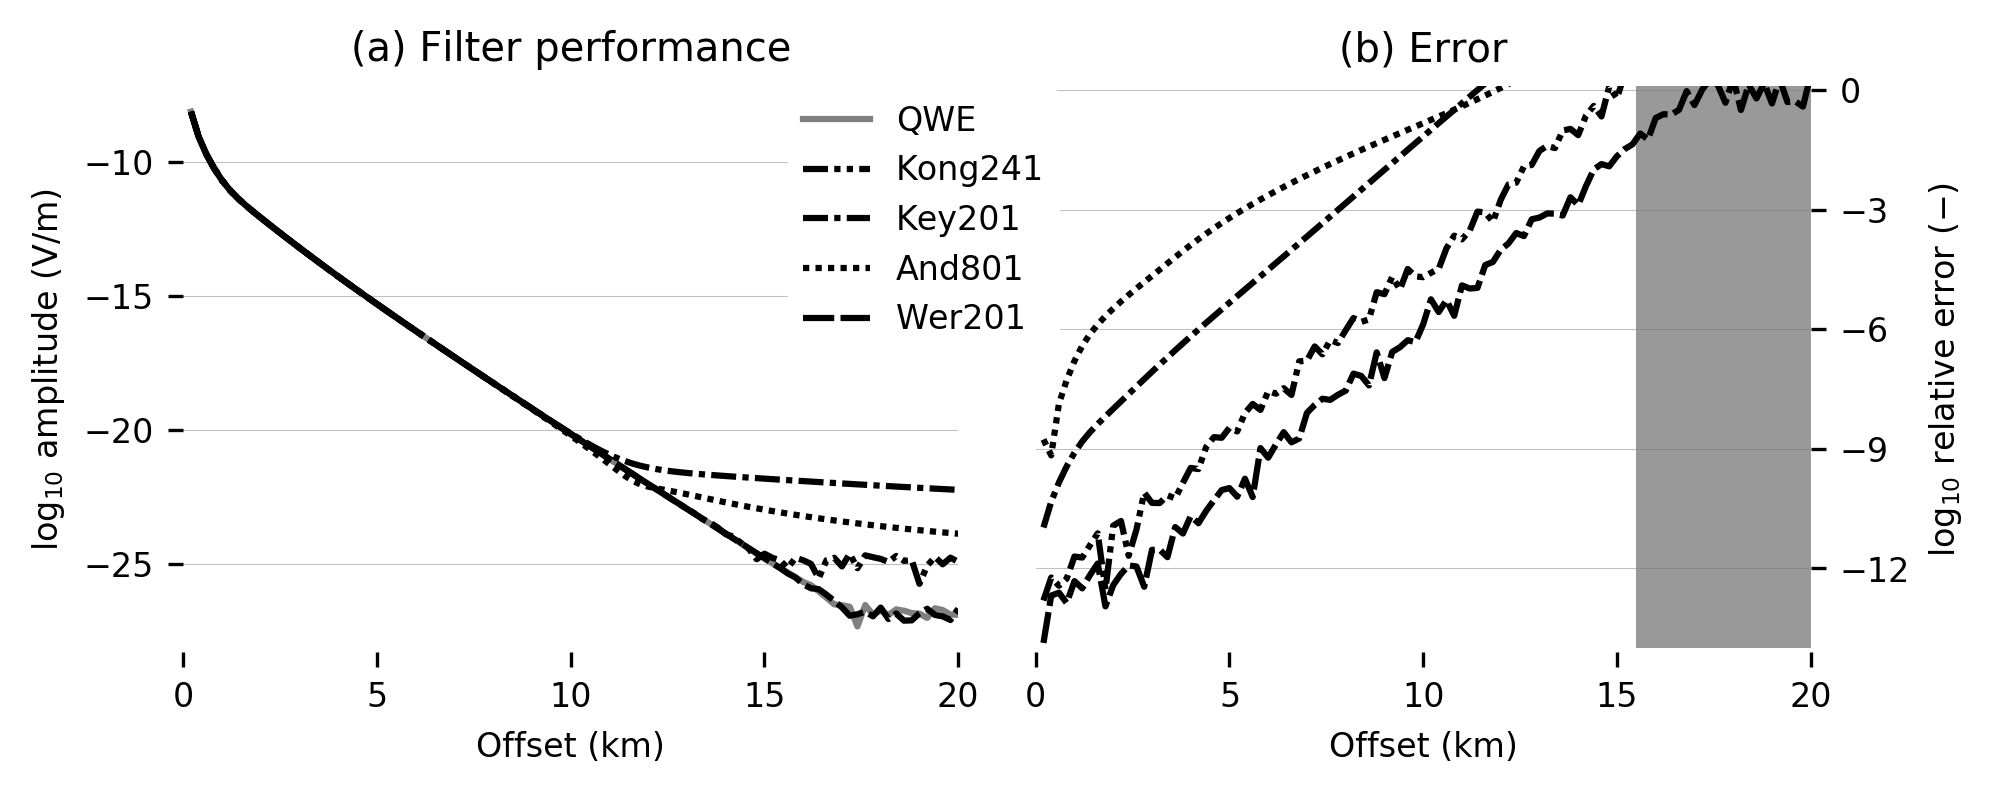

In [5]:
plt.figure(figsize=(7, 2.5))
plt.subplots_adjust(wspace=0.1)


# (b) Relative error
ax2 = create_axis(122, '(b) Error')
for key, value in kong.items():
    plt.plot(x/1e3, error(value, kqwe), 'k', linestyle=ls[key])

# Make grey arrea of nonsense-errors
plt.fill([15.5, 20, 20, 15.5, 15.5], [-14, -14, 1, 1, -14], '.6')

# Y-axis
ax2.set_ylim([-14.1, 0.1])
ax2.set_yticks([0, -3, -6, -9, -12])
ax2.set_ylabel(r'$\log_{10}$ relative error ($-$)')


# (a) Amplitude
ax1 = create_axis(121, '(a) Filter performance')
plt.plot(x/1e3, abs10(kqwe), '0.5', label='QWE')
for key, value in kong.items():
    plt.plot(x/1e3, abs10(value), 'k', linestyle=ls[key], label=key)

# Legend
plt.legend(loc=1, edgecolor='1', framealpha=1, bbox_to_anchor=(1.15, 1.02))

# Y-axis
ax1.set_ylabel(r'$\log_{10}$ amplitude (V/m)')

# Save and show
if save:
    for ending in ['png', 'pdf', 'eps']:
        plt.savefig('../figures/Figure-5-bw.'+ending, bbox_inches='tight')
plt.show()

## Key Figure 5 and land case

In [6]:
# 1. Key figure 5

# Update model
inp2 = inp.copy()
inp2['src'][2] = 1990
inp2['rec'][2] = 2000 
inp2['depth'] = [0, 1000, 2000, 2100]
inp2['res'] = [1/1e-12, 1/3.3, 1, 100, 1]
inp2['epermH'] = [0, 1, 1, 1, 1]
inp2['epermV'] = [0, 1, 1, 1, 1]

# Calculate responses
marine = {}
marine['Kong241'] = epm.dipole(htarg='kong_241_2007', **inp2)
marine['Key201'] = epm.dipole(htarg='key_201_2012', **inp2)
marine['And801'] = epm.dipole(htarg='anderson_801_1982', **inp2)
marine['Wer201'] = epm.dipole(htarg='wer_201_2018', **inp2)
mqwe = epm.dipole(ht='qwe', **inp2)
      
# 2. Land case

# Update model
inp3 = inp.copy()
inp3['src'][2] = 0.5
inp3['rec'][2] = 0.8 
inp3['depth'] = [0, 1000, 1100]
inp3['res'] = [2e14, 10, 500, 10]
inp3['epermH'] = [0, 1, 1, 1]
inp3['epermV'] = [0, 1, 1, 1]

# Calculate responses
land = {}
land['Kong241'] = epm.dipole(htarg='kong_241_2007', **inp3)
land['Key201'] = epm.dipole(htarg='key_201_2012', **inp3)
land['And801'] = epm.dipole(htarg='anderson_801_1982', **inp3)
land['Wer201'] = epm.dipole(htarg='wer_201_2018', **inp3)
lqwe = epm.dipole(ht='qwe', **inp3)

* WARNING :: Hankel-quadrature did not converge at least once;
             => desired `atol` and `rtol` might not be achieved.


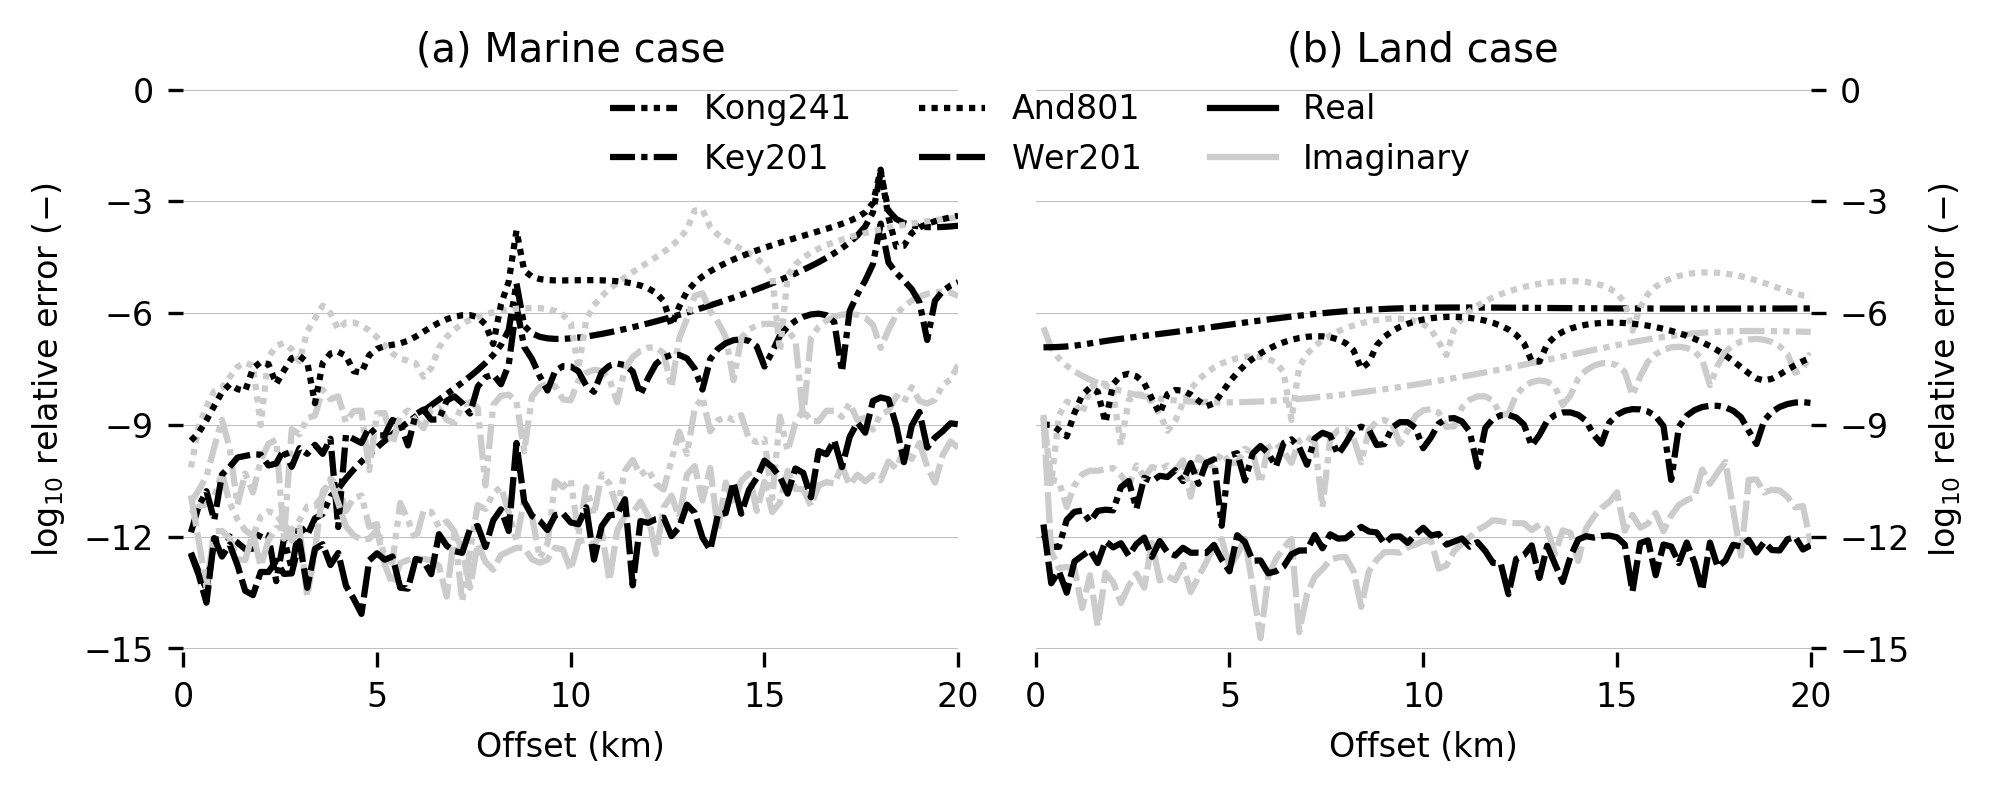

In [7]:
# Initiate figure
plt.figure(figsize=(7, 2.5))
plt.subplots_adjust(wspace=0.1)


# Subplot 1: Marine case
ax1 = create_axis(121, '(a) Marine case')
for key, value in marine.items():
    plt.plot(x/1e3, error(value.imag, mqwe.imag), '0.8', linestyle=ls[key])
    plt.plot(x/1e3, error(value.real, mqwe.real), 'k', linestyle=ls[key], label=key)

# Y-axis
ax1.set_yticks([0, -3, -6, -9, -12, -15])
ax1.set_ylim([-15.1, 0.1])
ax1.set_ylabel(r'$\log_{10}$ relative error ($-$)')

    
# Subplot 2: Land case
ax2 = create_axis(122, '(b) Land case')
for key, value in land.items():
    plt.plot(x/1e3, error(value.imag, lqwe.imag), '0.8', linestyle=ls[key])
    plt.plot(x/1e3, error(value.real, lqwe.real), 'k', linestyle=ls[key], label=key)

# For real/imaginary-legend entries
plt.plot(1e3, 0.1, 'k', label=r'Real')
plt.plot(1e3, 0.1, '0.8', label='Imaginary')

# Y-axis
ax2.set_yticks([0, -3, -6, -9, -12, -15])
ax2.set_ylim([-15.1, 0.1])
ax2.set_ylabel(r'$\log_{10}$ relative error ($-$)')

# Legend
plt.legend(ncol=3, loc=1, frameon=False, bbox_to_anchor=(0.6, 1.04))


# Save and show
if save:
    for ending in ['png', 'pdf', 'eps']:
        plt.savefig('../figures/Figure-6-bw.'+ending, bbox_inches='tight')

plt.show()

In [8]:
epm.versions('HTML')